# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

**Dataset: Mesa RMS Incident Data**
http://open.mesaaz.gov/dataviews/225897/city-of-mesa-rms-crime-data-table/

The incident data recorded information of each reports, i.e., transactional. And the size of this table is appropriate.

In [2]:
!wget http://open.mesaaz.gov/rest/datastreams/220029/data.csv

--2016-11-28 04:39:34--  http://open.mesaaz.gov/rest/datastreams/220029/data.csv
Resolving open.mesaaz.gov (open.mesaaz.gov)... 54.241.30.211, 54.241.249.48
Connecting to open.mesaaz.gov (open.mesaaz.gov)|54.241.30.211|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

data.csv                [          <=>         ]  28.19M  12.9MB/s   in 2.2s   

2016-11-28 04:39:53 (12.9 MB/s) - ‘data.csv’ saved [29564531]



In [3]:
!mv data.csv p2.csv

In [4]:
!wc -l p2.csv

224711 p2.csv


## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [5]:
!csvcut -n p2.csv

  1: CRIME_ID
  2: CRIME_TYPE
  3: REPORT_DATE
  4: OCCURRED_DATE
  5: STREET_NUMBER
  6: STREET
  7: CITY
  8: STATE
  9: IBRCODE
 10: IBRDESC
 11: 


In [6]:
!csvstat p2.csv

  1. CRIME_ID
	<class 'int'>
	Nulls: False
	Min: 19760013373
	Max: 99999999999
	Sum: 4526875611345035
	Mean: 20145412359.685974
	Median: 20143070618.5
	Standard Deviation: 168934333.5827806
	Unique values: 222668
	5 most frequent values:
		20131020145:	5
		20132910773:	4
		20160900332:	4
		20142590732:	4
		20160910049:	4
  2. CRIME_TYPE
	<class 'str'>
	Nulls: False
	Unique values: 513
	5 most frequent values:
		WARRANT ARREST:	19030
		THEFT:	15703
		WARRANT ARREST-FOJ:	12686
		SHOPLIFTING:	11356
		CRIMINAL DAMAGE:	10739
	Max length: 59
  3. REPORT_DATE
	<class 'datetime.datetime'>
	Nulls: False
	Min: 2013-01-31 00:00:00
	Max: 2016-08-31 00:00:00
	Unique values: 5163
	5 most frequent values:
		2016-03-31 00:00:00:	359
		2015-12-24 00:00:00:	318
		2016-03-30 00:00:00:	317
		2015-12-17 00:00:00:	263
		2015-06-23 00:00:00:	252
  4. OCCURRED_DATE
	<class 'datetime.datetime'>
	Nulls: True
	Min: 1953-01-01 00:00:00
	Max: 2016-08-31 00:00:00
	Unique values: 5499
	5 most frequent values:
		2015

In [62]:
import pandas as pd
mesa = pd.read_csv('p2.csv', header=0)

In [8]:
mesa.count()

CRIME_ID         224710
CRIME_TYPE       224710
REPORT_DATE      224710
OCCURRED_DATE    218659
STREET_NUMBER    224710
STREET           224405
CITY             224409
STATE            224412
IBRCODE          224707
IBRDESC          224707
Unnamed: 10           1
dtype: int64

### columns meaning &missing value
1: CRIME_ID : Id of the incident report   (0)  
2: CRIME_TYPE : Type of this incident     (0)  
3: REPORT_DATE : Date of report    (0)  
4: OCCURRED_DATE : Date of the occurrence of the incident  (6051)  
5: STREET_NUMBER : Street number   (0)  
6: STREET : Name of the street   (296)  
7: CITY :  Name of the city      (301)  
8: STATE : Name of the state     (298)  
9: IBRCODE : Incident code in Incident-Based Reporting system   (3)  
10: IBRDESC : Description of the incident in Incident-Based Reporting system      (3)  
11:            : This column has no name. We will discuss it later in Problem2    (224709)  
 
There are eleven columns in the metadata. They describes the incident id, crime type, report/occurred date, location, and Incident-Based Reporting (IBR) information. There are null values. Csvstat shows that there are 224710 records while the dataframe shows only 224706 records. Also some crime records do not have address information or ibr information. But we don't think null value could hurt the model so we keep them.
  
We are interest in CRIME_TYPE, OCCURRED_DATE, STREET_NUMBER, and STREET because these columns provide information about time and location of the crime. They may give us some insight.

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

**Date, address, ibr information could be dimensions. Actually there is no columns that contains facts which could be aggregated. So we decide to use  count and group by function to do the analysis. **

In [2]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [11]:
!createdb -U dbuser project02

In [4]:
%sql postgresql://dbuser@localhost:5432/project02

'Connected: dbuser@project02'

In [13]:
%%sql
DROP TABLE IF EXISTS crime_facts;
CREATE TABLE crime_facts (
    CRIME_ID       CHAR(11),
    CRIME_TYPE     VARCHAR(64),
    REPORT_DATE    DATE,
    OCCURRED_DATE  VARCHAR(30),
    STREET_NUMBER  VARCHAR(5),
    STREET         VARCHAR(64),
    CITY           VARCHAR(30),
    STATE          CHAR(2),
    IBRCODE        VARCHAR(10),
    IBRDESC        VARCHAR(64),
    extra          VARCHAR(4)
);

Done.
Done.


[]

Load csv to a table in database p2.

In [14]:
!pwd

/home/jovyan/work


In [15]:
%%sql
COPY crime_facts FROM '/home/jovyan/work/p2.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

224710 rows affected.


[]

Because there are 6051 rows in OCCURRED_DATE are missing value and not in DATE format, we decide to transform them into '00/00/0000'


In [16]:
%%sql
UPDATE crime_facts
set OCCURRED_DATE='01/01/1111'
WHERE OCCURRED_DATE = '';

6051 rows affected.


[]

In [17]:
%%sql
ALTER TABLE crime_facts
ALTER COLUMN OCCURRED_DATE SET DATA TYPE DATE USING occurred_date::date

Done.


[]

Check all records are loaded.

In [18]:
%%sql
SELECT COUNT(*)
FROM crime_facts;

1 rows affected.


count
224710


We can see from csvstat that the value in 'extra' column is 2016. Query below shows that only one row has value in 'extra' column. So we decide to drop this column since it is meaningless.

In [19]:
%%sql
SELECT extra FROM crime_facts
WHERE extra = '2016';

1 rows affected.


extra
2016


In [20]:
%%sql
ALTER TABLE crime_facts DROP COLUMN extra RESTRICT;

Done.


[]

CRIME_ID of each row is not unique so we create anothor row served as identifier as well as primary key of the facts table.

In [21]:
%%sql
ALTER TABLE crime_facts ADD COLUMN report_id SERIAL PRIMARY KEY;

Done.


[]

Take a look at crime_facts table

In [22]:
%%sql
SELECT * FROM crime_facts
LIMIT 5;

5 rows affected.


crime_id,crime_type,report_date,occurred_date,street_number,street,city,state,ibrcode,ibrdesc,report_id
20162130448,CRIM TRESP 1ST DEG-RSID-STRUCT - DV,2016-07-31,2016-07-29,2300,N LEMA DR,MESA,AZ,90J,TRESPASS OF REAL PROPERTY,1
20162130334,ABANDONED VEHICLE,2016-07-31,2016-07-31,900,S DOBSON RD,MESA,AZ,90Z,OTHER OFFENSES,2
20162130099,ASSAULT-INTENT-RECKLESS-INJURE - DV,2016-07-31,2016-07-31,7000,E MAIN ST,MESA,AZ,13B,SIMPLE ASSAULT,3
20162130060,DRIVE ON SUSPENDED OR REVOKED LICENSE,2016-07-31,2016-07-31,300,N GILBERT RD,MESA,AZ,999,NOT REPORTABLE,4
20162130061,DRUG PARAPHERNALIA-POSSESS-USE,2016-07-31,2016-07-31,900,S COUNTRY CLUB DR,MESA,AZ,35B,DRUG EQUIPMENT VIOLATION,5


**Explore the data**

In [24]:
%%sql
SELECT DISTINCT CRIME_TYPE, IBRDESC
FROM crime_facts
LIMIT 20;

20 rows affected.


crime_type,ibrdesc
ACCIDENT-NON INJURY,NOT REPORTABLE
TRAFFICKING IN STOLEN PROPERTY,NOT REPORTABLE
FAILURE TO PROVIDE IDENTIFICATION,DRIVING UNDER THE INFLUENCE
MISSING JUVENILE,DRUG EQUIPMENT VIOLATION
POSSESSION OF STOLEN PROPERTY,THEFT OF MOTOR VEHICLE PARTS OR ACCESSOR
CUSTODIAL INTERFERENCE,INTIMIDATION
OBSCENE/HARASSING CALLS,OTHER OFFENSES
FORGERY,FALSE PRETENSES/SWINDLE/CONFIDENCE GAME
DISCHARGE OF WEAPON,SIMPLE ASSAULT
DEATH - INVESTIGATION,"FAMILY OFFENSES, NONVIOLENT"


### IBRDESC and CRIEM_TYPE
There are 83 unique value in ibrdesc and 513 in crime_type. These two columns all record catagory of the incidents. Some of their records are similar. For example, "THREAT-INTIMIDATE - DV	" and "INTIMIDATION". But information in crime_type column is more detailed classified.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
%%sql
SELECT to_char(OCCURRED_DATE,'MM') as mon,
       COUNT(*) AS COUNT
FROM crime_facts
WHERE OCCURRED_DATE < '01/01/2016'
GROUP BY 1
ORDER BY mon ASC

12 rows affected.


mon,count
01,17068
02,14419
03,15585
04,15488
05,15987
06,15244
07,15886
08,16262
09,15520
10,16096


<Container object of 12 artists>

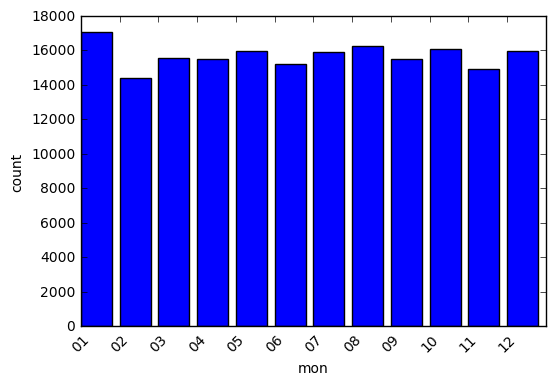

In [26]:
time = _
time.bar()

In [27]:
%%sql
SELECT EXTRACT(year FROM OCCURRED_DATE) AS YYYY,
       COUNT(*) AS COUNT
FROM crime_facts
GROUP BY 1
ORDER BY YYYY ASC

28 rows affected.


yyyy,count
1111.0,6051
1953.0,1
1973.0,1
1985.0,1
1991.0,3
1992.0,2
1995.0,3
1996.0,2
1997.0,1
1998.0,1


<Container object of 28 artists>

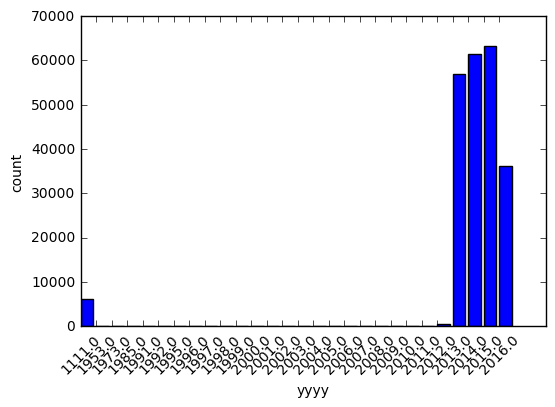

In [28]:
time = _
time.bar()

In [40]:
%%sql
SELECT to_char(OCCURRED_DATE, 'YYYY-MM') AS YearMon ,COUNT(*) AS COUNT
FROM crime_facts
WHERE OCCURRED_DATE >= '2015-01-01'
GROUP BY YearMon
ORDER BY YearMon ASC

20 rows affected.


yearmon,count
2015-01,5395
2015-02,4931
2015-03,5490
2015-04,5289
2015-05,5390
2015-06,5196
2015-07,5471
2015-08,5393
2015-09,5272
2015-10,5348


<Container object of 20 artists>

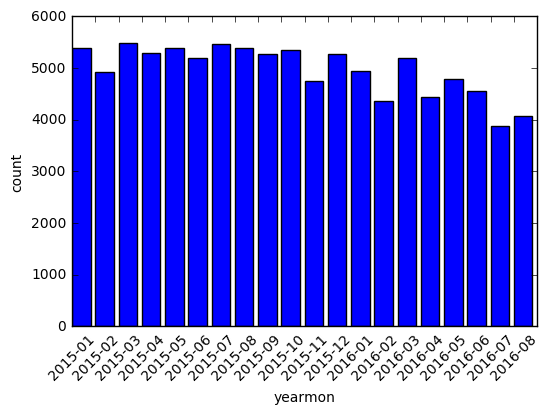

In [41]:
time = _
time.bar()

We could see that most of the incident reports happened after year 2012. This may due to early records are missing or data before 2012 are not well digitalized.  
   
We could also see from the plot that incidents in February are a bit less than that in other months. Monthly number of incident in 2016 are a bit less that that in 2015. Overall the number of incidents does not vary a lot by month.

Top 20 types of crime

In [31]:
%%sql
SELECT CRIME_TYPE, COUNT(*) AS COUNT
FROM crime_facts
GROUP BY CRIME_TYPE
ORDER BY COUNT DESC
LIMIT 20

20 rows affected.


crime_type,count
WARRANT ARREST,19030
THEFT,15703
WARRANT ARREST-FOJ,12686
SHOPLIFTING,11356
CRIMINAL DAMAGE,10739
ASSAULT,10737
DRIVING UNDER INFLUENCE,7621
DRIVING ON SUSPENDED LICENSE,7018
TRESPASS,6689
INFORMATION OTHER,6091


## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

In [5]:
from IPython.display import Image
Image(url = "https://github.com/qyw0/istm-6212/blob/master/project2/P2.jpg")

Our star schema model consists of one facts table and three dimension tables. The grain of the fact table is each incident report.
Report_date and occurred_date could tell us information about the time of incidents. Columns related to location such as street_number and street describe the geological location of the crime. And IBR information and crime_type could tell us the type or detail of the crime. These information are very important to our analysis and incidents records could be filtered by location, time, and crime type. 

## Create Address Dimension

In [10]:
%%sql
DROP TABLE IF EXISTS address;
SELECT DISTINCT STREET_NUMBER, STREET, CITY, STATE
INTO address
FROM crime_facts;

Done.
15713 rows affected.


[]

Create surrogate key, which is also the promary key for dimension address 

In [11]:
%%sql
ALTER TABLE address ADD COLUMN ADDRESS_KEY SERIAL PRIMARY KEY;

Done.


[]

Add ADDRESS_KEY into crime_facts table

In [12]:
%%sql
ALTER TABLE crime_facts ADD COLUMN ADDRESS_KEY INTEGER;

(psycopg2.ProgrammingError) column "address_key" of relation "crime_facts" already exists
 [SQL: 'ALTER TABLE crime_facts ADD COLUMN ADDRESS_KEY INTEGER;']


In [13]:
%%sql
UPDATE crime_facts
SET ADDRESS_KEY = (SELECT ADDRESS_KEY FROM address 
                   WHERE address.STREET_NUMBER = crime_facts.STREET_NUMBER
                   AND address.STREET = crime_facts.STREET
                   AND address.CITY = crime_facts.CITY);

224710 rows affected.


[]

In [14]:
%%sql
SELECT * FROM address
LIMIT 5;

5 rows affected.


street_number,street,city,state,address_key
100,S LESUEUR,MESA,AZ,1
11600,E MADERO AVE,MESA,AZ,2
800,N 48TH ST,MESA,AZ,3
900,W BROADWAY RD,MESA,AZ,4
6800,E ROLLINS ST,MESA,AZ,5


## Create  Incident-Based Reporting (IBR) Dimension

In [15]:
%%sql
DROP TABLE IF EXISTS ibr;
SELECT DISTINCT IBRCODE, IBRDESC, CRIME_TYPE
INTO ibr
FROM crime_facts;

Done.
2117 rows affected.


[]

In [16]:
%%sql
ALTER TABLE ibr ADD COLUMN IBR_KEY SERIAL PRIMARY KEY;

Done.


[]

In [17]:
%%sql
ALTER TABLE crime_facts ADD COLUMN IBR_KEY INTEGER;

Done.


[]

In [18]:
%%sql
UPDATE crime_facts
SET IBR_KEY = (SELECT IBR_KEY FROM ibr 
               WHERE ibr.IBRCODE = crime_facts.IBRCODE
               AND ibr.IBRDESC = crime_facts.IBRDESC
               AND ibr.CRIME_TYPE = crime_facts.CRIME_TYPE);

224710 rows affected.


[]

In [19]:
%%sql
SELECT * FROM ibr
LIMIT 5;

5 rows affected.


ibrcode,ibrdesc,crime_type,ibr_key
,,ASSAULT,1
,,THEFT,2
,,TRESPASS,3
09A,MURDER & NONNEGLIGENT MANSLAUGHTER,AGGRAVATED ASSAULT,4
09A,MURDER & NONNEGLIGENT MANSLAUGHTER,DEATH - INVESTIGATION,5


Check if the ibr table is correct

In [26]:
%%sql
SELECT DISTINCT CRIME_TYPE, IBRDESC
FROM crime_facts
WHERE IBRDESC = '';

3 rows affected.


crime_type,ibrdesc
THEFT,
ASSAULT,
TRESPASS,


## Create Date Dimension

In [27]:
%%sql
DROP TABLE IF EXISTS date;
SELECT DISTINCT REPORT_DATE, OCCURRED_DATE
INTO date
FROM crime_facts;

Done.
16889 rows affected.


[]

In [28]:
%%sql
ALTER TABLE date ADD COLUMN DATE_KEY SERIAL PRIMARY KEY;

Done.


[]

In [29]:
%%sql
ALTER TABLE crime_facts ADD COLUMN DATE_KEY INTEGER;

Done.


[]

In [30]:
%%sql
UPDATE crime_facts
SET DATE_KEY = (SELECT DATE_KEY FROM date
                WHERE date.REPORT_DATE = crime_facts.REPORT_DATE
                AND date.OCCURRED_DATE = crime_facts.OCCURRED_DATE);

224710 rows affected.


[]

In [35]:
%%sql
SELECT * FROM date
where date_key = 1998;

1 rows affected.


report_date,occurred_date,date_key
2015-07-26,2015-07-26,1998


## Create facts table

In [32]:
%%sql
DROP TABLE IF EXISTS facts;
CREATE TABLE facts(
    REPORT_ID      INTEGER PRIMARY KEY,
    CRIME_ID       CHAR(11),
    DATE_KEY       INTEGER REFERENCES date (DATE_KEY),
    ADDRESS_KEY    INTEGER REFERENCES address (ADDRESS_KEY),
    IBR_KEY        INTEGER REFERENCES ibr (IBR_KEY)
);

Done.
Done.


[]

In [33]:
%%sql
INSERT INTO facts(REPORT_ID, CRIME_ID, DATE_KEY, ADDRESS_KEY, IBR_KEY)
SELECT REPORT_ID, CRIME_ID, DATE_KEY, ADDRESS_KEY, IBR_KEY
FROM crime_facts;

224710 rows affected.


[]

In [34]:
%%sql
SELECT * FROM facts
LIMIT 5;

5 rows affected.


report_id,crime_id,date_key,address_key,ibr_key
59615,20152070672,1998,12068,1722
59904,20152060585,4491,9322,1976
59613,20152070223,1998,1541,1041
59614,20152070373,1998,1181,1891
59616,20152070016,1998,14507,182


## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

**This star schema model can help users find crime records based on location or incident code. Since there's not fact in facts table that could be aggregated, we use count and group by to do the analysis.**

In [63]:
from pandas import DataFrame

**Top 10 street with most crimes in Mesa**

In [47]:
%%sql
SELECT address.STREET, COUNT(facts.REPORT_ID) AS COUNT
FROM address, facts
WHERE address.ADDRESS_KEY = facts.ADDRESS_KEY AND address.CITY = 'MESA'
GROUP BY address.STREET
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


street,count
E MAIN ST,10455
W MAIN ST,8382
S COUNTRY CLUB DR,7821
N ROBSON,7675
E BROADWAY RD,6566
S DOBSON RD,5981
E SOUTHERN AVE,5758
E UNIVERSITY DR,4511
N COUNTRY CLUB DR,4350
W SOUTHERN AVE,4060


<Container object of 10 artists>

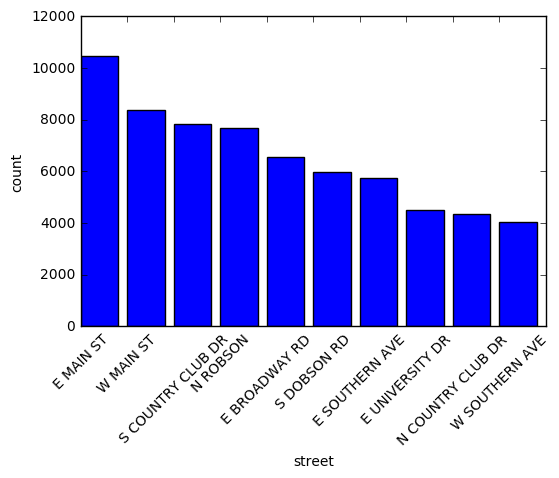

In [48]:
street = _
street.bar()

Incidents in E Main Street are much more than in other streets. Lets see what kind of crimes happened there

In [52]:
%%sql
SELECT CRIME_TYPE, COUNT(facts.REPORT_ID) AS COUNT
FROM address, facts, ibr
WHERE address.ADDRESS_KEY = facts.ADDRESS_KEY
      AND ibr.IBR_KEY = facts.IBR_KEY
      AND address.STREET = 'E MAIN ST'
GROUP BY CRIME_TYPE
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


crime_type,count
WARRANT ARREST,924
THEFT,868
WARRANT ARREST-FOJ,852
POSSESSION OF DRUGS - NOT MARIJUANA,604
DRIVING UNDER INFLUENCE,481
TRESPASS,477
DRIVING ON SUSPENDED LICENSE,436
POSSESSION OF DRUG PARAPHERNALIA,434
ASSAULT,413
CRIMINAL DAMAGE,346


The top three crime type in E MAIN ST are the same with that in whole dataset(problem 2). However, we noticed that crime related to drugs in this street is more frequent than average. 'POSSESSION OF DRUGS - NOT MARIJUANA' ranks 4th and 'POSSESSION OF DRUG PARAPHERNALIA' ranks 8th in this street, compare to 14th and 19th in whole dataset. Lets look at the streets with most drug violation.

In [54]:
%%sql
SELECT address.STREET, COUNT(facts.REPORT_ID) AS COUNT
FROM address, facts, ibr
WHERE address.ADDRESS_KEY = facts.ADDRESS_KEY 
      AND ibr.IBR_KEY = facts.IBR_KEY
      AND ibr.IBRDESC LIKE '%DRUG%'
GROUP BY address.STREET
ORDER BY COUNT DESC
LIMIT 5;

5 rows affected.


street,count
E MAIN ST,1619
S COUNTRY CLUB DR,1122
W MAIN ST,1026
E BROADWAY RD,776
S DOBSON RD,486


E Main Street indeed is the street that drug violation happened most.

In [60]:
%%sql
SELECT to_char(date.OCCURRED_DATE, 'YYYY-MM') AS YearMon, COUNT(facts.REPORT_ID) AS COUNT
FROM facts, ibr, date
WHERE date.DATE_KEY = facts.DATE_KEY
      AND ibr.IBR_KEY = facts.IBR_KEY
      AND ibr.IBRDESC LIKE '%DRUG%'
GROUP BY YearMon
ORDER BY YearMon;

45 rows affected.


yearmon,count
1111-01,316
2013-01,24
2013-02,323
2013-03,331
2013-04,352
2013-05,389
2013-06,344
2013-07,377
2013-08,407
2013-09,432


In [64]:
freq = _
df = pd.DataFrame.from_records(freq,columns=['yearmon', 'COUNT'], index = ['yearmon'])

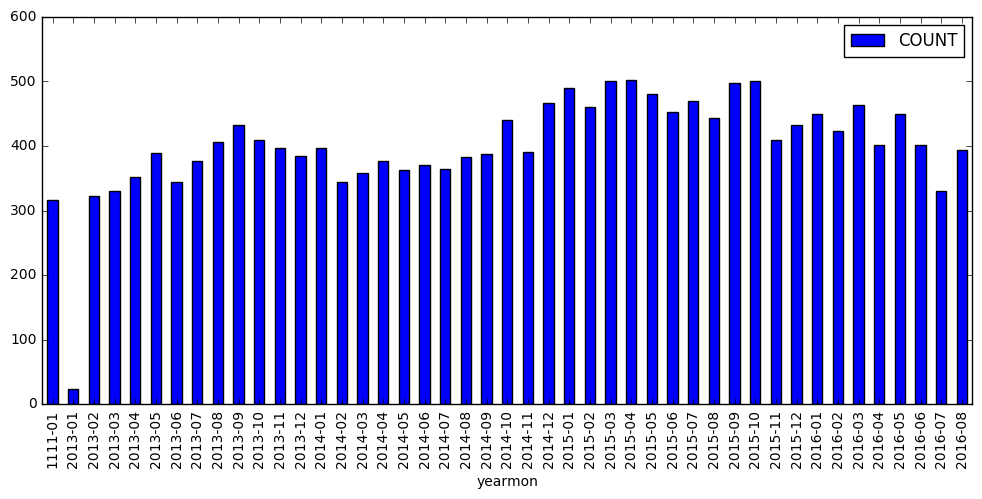

In [67]:
df.plot.bar(figsize=(12,5))

In [73]:
%%sql
SELECT to_char(date.OCCURRED_DATE, 'YYYY') AS Year, COUNT(facts.REPORT_ID) AS COUNT
FROM facts, ibr, date
WHERE date.DATE_KEY = facts.DATE_KEY
      AND ibr.IBR_KEY = facts.IBR_KEY
      AND ibr.IBRDESC LIKE '%DRUG%'
      AND date.OCCURRED_DATE > '1111-01-01'
GROUP BY Year
ORDER BY Year;

4 rows affected.


year,count
2013,4169
2014,4644
2015,5640
2016,3314


<Container object of 4 artists>

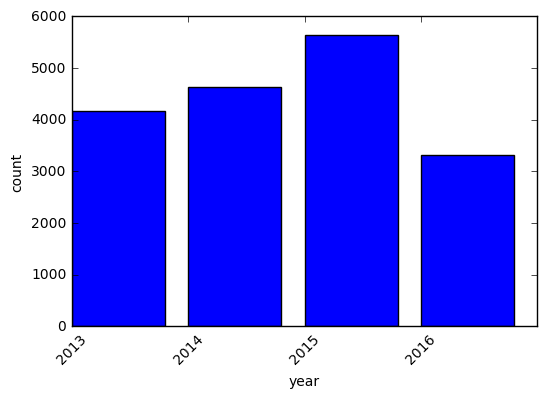

In [74]:
year = _
year.bar()

In [79]:
%%sql
SELECT to_char(date.OCCURRED_DATE, 'MM') AS month, COUNT(facts.REPORT_ID) AS COUNT
FROM facts, ibr, date
WHERE date.DATE_KEY = facts.DATE_KEY
      AND ibr.IBR_KEY = facts.IBR_KEY
      AND ibr.IBRDESC LIKE '%DRUG%'
      AND date.OCCURRED_DATE BETWEEN '2013-01-01' and '2015-12-31'
GROUP BY month
ORDER BY month;

12 rows affected.


month,count
01,911
02,1129
03,1191
04,1232
05,1232
06,1167
07,1210
08,1234
09,1318
10,1350


<Container object of 12 artists>

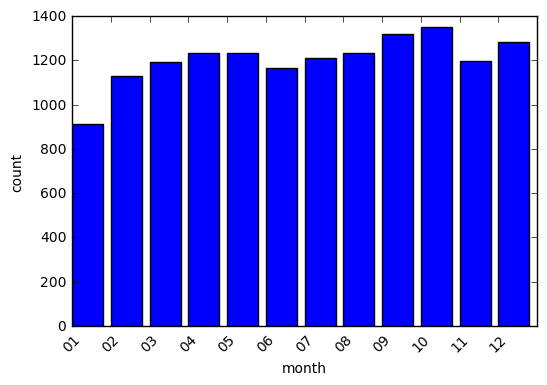

In [80]:
mon = _
mon.bar()

Drug violation happended a bit more in Semptember, October, and December. And number of drug related crime rised each year. Early data not recorded may be a cause of that. Drud related incidents count is really low in 2013-01. There may be missing data. Also we only have three year's complete data which is not enough to draw a convincing conclusion.

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

## Contribution
We worked together to choose a dataset and design the star schema.               
**Qinya Wang** wrote the part that loaded data and created tables.                                 
**Tianweibao Zheng** wrote analysis queries and most of the markdown cells.    
We attest that each of us contributed substantially to the project.